# ANNEX: B
# WORLD WIDE COVID 19 CASES PREDICTION USING NEURAL NETWORK 
## SUBMITTED BY: FAISAL JAVED
### MACHINE LEARNING PROJECT_2 (MS RIME 2020)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## DATA SET DETAILS 
### GATHERING & CLEANING

In [2]:
Data = pd.read_excel("Country wise Covid Data.xlsx")
Data.head()

,CONTINENT,LOCATION,DATE,COUNTRY_SERIES,DATE_CODE,COUNTRY_CODE,POPULATION DENSITY,HUMAN_DEVELOPMENT_INDEX,TEMPERATURES,CASES
0,Asia,Afghanistan,2020-01-23,0,0,0,54.422,0.498,7.0,0
1,Asia,Afghanistan,2020-01-24,1,1,0,54.422,0.498,7.0,0
2,Asia,Afghanistan,2020-01-25,2,2,0,54.422,0.498,13.0,0
3,Asia,Afghanistan,2020-01-26,3,3,0,54.422,0.498,2.0,0
4,Asia,Afghanistan,2020-01-27,4,4,0,54.422,0.498,6.0,0


In [3]:
X = Data.drop(['LOCATION','CONTINENT','DATE','COUNTRY_SERIES','CASES',],1)

### DATA SCALING

In [4]:
x = X/(X.max(axis=0) + np.spacing(0))

In [5]:
x.head()

,DATE_CODE,COUNTRY_CODE,POPULATION DENSITY,HUMAN_DEVELOPMENT_INDEX,TEMPERATURES
0,0.000000,0.0,0.002813,0.52256,0.134615
1,0.003135,0.0,0.002813,0.52256,0.134615
2,0.006270,0.0,0.002813,0.52256,0.250000
3,0.009404,0.0,0.002813,0.52256,0.038462
4,0.012539,0.0,0.002813,0.52256,0.115385


In [6]:
x.shape

(54720, 5)

### DATA SPLITING & RESHAPING

In [7]:
data_train = round(0.6*len(Data))
data_valid = round(data_train+0.2*len(Data))

In [8]:
train_x = x[:data_train]
valid_x = x[data_train:data_valid]
test_x = x[data_valid:]

In [9]:
train_x = train_x.T
train_x.shape

(5, 32832)

In [10]:
valid_x = valid_x.T
valid_x.shape

(5, 10944)

In [11]:
test_x = test_x.T
test_x.shape

(5, 10944)

In [12]:
Y = Data['CASES']

In [13]:
train_y = Y[:data_train]
valid_y = Y[data_train:data_valid]
test_y = Y[data_valid:]

In [14]:
train_y = train_y.values.reshape(1,train_x.shape[1])
train_y.shape

(1, 32832)

In [15]:
valid_y = valid_y.values.reshape(1,valid_x.shape[1])
valid_y.shape

(1, 10944)

In [16]:
test_y = test_y.values.reshape(1,test_x.shape[1])
test_y.shape

(1, 10944)

## DEFINING FUNCTIONS

### LAYER STRUCTURE

In [17]:
def layer_size (train_x,train_y):
    x_node = train_x.shape[0] #Size of the input layer 
    h1 = 16 #size of first hidden layer
    h2 = 16 #size of second hidden layer
    y_node = train_y.shape[0] #Size of the input layer 
    return (x_node,h1,h2,y_node)

In [18]:
(x_node, h1,h2, y_node) = layer_size(train_x, train_y)
print("The size of the input layer is: x_node = " + str(x_node))
print("The size of the first hidden layer is: h1 = " + str(h1))
print("The size of the second hidden layer is: h2 = " + str(h2))
print("The size of the output layer is: y_node = " + str(y_node))

The size of the input layer is: x_node = 5
The size of the first hidden layer is: h1 = 16
The size of the second hidden layer is: h2 = 16
The size of the output layer is: y_node = 1


### INITIALIZE PARAMETERS

In [19]:
# Initializing Model Parameters
def init_parameters(x_node,h1,h2,y_node):
    np.random.seed(2) # set up a seed so that output matches remains same although the initialization is random.
    W1 = np.random.randn(h1,x_node)*0.01
    b1 = np.zeros((h1,1))
    W2 = np.random.randn(h2,h1)*0.01
    b2 = np.zeros((h2,1))
    W3 = np.random.randn(y_node,h2)*0.01
    b3 = np.zeros((y_node,1))
    
    #checking dimensions of the parameters 
    assert (W1.shape == (h1, x_node))
    assert (b1.shape == (h1, 1))
    assert (W2.shape == (h2, h1))
    assert (b2.shape == (h2, 1))
    assert (W3.shape == (y_node, h2))
    assert (b3.shape == (y_node, 1))
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2,
                  "W3": W3,
                  "b3": b3}
    return parameters
    

In [20]:
parameters = init_parameters(x_node, h1,h2, y_node)
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))
print("W3 = " + str(parameters["W3"]))
print("b3 = " + str(parameters["b3"]))

W1 = [[-4.16757847e-03 -5.62668272e-04 -2.13619610e-02  1.64027081e-02
  -1.79343559e-02]
 [-8.41747366e-03  5.02881417e-03 -1.24528809e-02 -1.05795222e-02
  -9.09007615e-03]
 [ 5.51454045e-03  2.29220801e-02  4.15393930e-04 -1.11792545e-02
   5.39058321e-03]
 [-5.96159700e-03 -1.91304965e-04  1.17500122e-02 -7.47870949e-03
   9.02525097e-05]
 [-8.78107893e-03 -1.56434170e-03  2.56570452e-03 -9.88779049e-03
  -3.38821966e-03]
 [-2.36184031e-03 -6.37655012e-03 -1.18761229e-02 -1.42121723e-02
  -1.53495196e-03]
 [-2.69056960e-03  2.23136679e-02 -2.43476758e-02  1.12726505e-03
   3.70444537e-03]
 [ 1.35963386e-02  5.01857207e-03 -8.44213704e-03  9.76147160e-08
   5.42352572e-03]
 [-3.13508197e-03  7.71011738e-03 -1.86809065e-02  1.73118467e-02
   1.46767801e-02]
 [-3.35677339e-03  6.11340780e-03  4.79705919e-04 -8.29135289e-03
   8.77102184e-04]
 [ 1.00036589e-02 -3.81092518e-03 -3.75669423e-03 -7.44707629e-04
   4.33496330e-03]
 [ 1.27837923e-02 -6.34679305e-03  5.08396243e-03  2.1611600

### SIGMOID FUNCTION

In [21]:
def sigmoid(z):
        return 1.0/(1.0+np.exp(-z))

### FORWARD PROPAGATION

In [22]:
def forward_propagation(train_x, parameters):
    # train_x = input data of size (n_x, m)
    # Retrieve each parameter from the dictionary "parameters"
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    W3 = parameters["W3"]
    b3 = parameters["b3"]
    
    Z1 = np.dot(W1,train_x) + b1
    A1 = sigmoid(Z1)
    Z2 = np.dot(W2,A1) + b2
    A2 = sigmoid(Z2)
    Z3=  np.dot(W3,A2) + b3
    A3=  Z3
    
    assert(A3.shape == (1, train_x.shape[1]))
    
    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2,
             "Z3": Z3,
             "A3": A3
            }
    
    return A3, cache

In [23]:
A3, cache = forward_propagation(train_x, parameters)
print(np.mean(cache['Z1']) ,np.mean(cache['A1']),np.mean(cache['Z2']),np.mean(cache['A2']),np.mean(cache['Z3']),np.mean(cache['A3']))

-0.001606867733880236 0.49959828459306316 -0.0013772194225159066 0.49965567279322154 0.03515192048911709 0.03515192048911709


### COST FUNCTION

In [24]:
def compute_cost(A3, train_y, parameters,lambda_):   #Defining Cost Function 
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    W3 = parameters["W3"]
    b3 = parameters["b3"]
    
    m = train_y.shape[1]
    regularisation = lambda_*np.sum(np.power(W1,2))+lambda_*np.sum(np.power(W2,2)) +lambda_*np.sum(np.power(W3,2)) 
    cost=(np.sum(np.power((A3-train_y),2)) + regularisation) /(2*m)
    cost = np.squeeze(cost)
    assert(isinstance(cost, float))
    return cost
          

### BACKWARD PROPAGATION

In [25]:
def backward_propagation(parameters, cache, train_x, train_y,lambda_):
    m = train_x.shape[1]
    W1 = parameters["W1"]
    W2 = parameters["W2"]
    W3 = parameters["W3"]
    A1 = cache["A1"]
    A2 = cache["A2"]
    A3 = cache["A3"]
    
    dZ3 = A3-train_y
    dW3 = 1/m*(np.dot(dZ3,A2.T)) + (lambda_*W3)/m
    db3 = 1/m*(np.sum(dZ3,axis=1, keepdims=True))
    dZ2 = np.multiply(np.dot(W3.T,dZ3),(A2*(1-A2)))
    dW2 = 1/m*(np.dot(dZ2,A1.T)) + (lambda_*W2)/m
    db2 = 1/m*(np.sum(dZ2,axis=1, keepdims=True))
    dZ1 = np.multiply(np.dot(W2.T,dZ2),(A1*(1-A1)))
    dW1 = 1/m*(np.dot(dZ1,train_x.T)) + (lambda_*W1)/m
    db1 = 1/m*(np.sum(dZ1,axis=1, keepdims=True))
    
    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2,
             "dW3": dW3,
             "db3": db3}
    return grads
    

In [26]:
grads = backward_propagation(parameters, cache, train_x, train_y,lambda_=10)
print ("dW1 = "+ str(grads["dW1"]))
print ("db1 = "+ str(grads["db1"]))
print ("dW2 = "+ str(grads["dW2"]))
print ("db2 = "+ str(grads["db2"]))
print ("dW3 = "+ str(grads["dW3"]))
print ("db3 = "+ str(grads["db3"]))

dW1 = [[ 2.34471718e-02  9.73014512e-03  3.54866865e-04  2.54501236e-02
   1.49741519e-02]
 [ 1.34249904e-02  5.57353598e-03  2.03145327e-04  1.45677613e-02
   8.57519204e-03]
 [ 8.74633559e-03  3.63570634e-03  1.34893130e-04  9.48589477e-03
   5.58798739e-03]
 [-2.69359725e-02 -1.11768528e-02 -4.11515987e-04 -2.92299787e-02
  -1.72064097e-02]
 [-3.99687270e-03 -1.65793808e-03 -6.07750402e-05 -4.33733764e-03
  -2.55266208e-03]
 [ 7.33296678e-03  3.04128685e-03  1.09405367e-04  7.95384308e-03
   4.68453350e-03]
 [ 7.51504246e-03  3.12560925e-03  1.08413537e-04  8.15620348e-03
   4.80248135e-03]
 [-3.60577436e-03 -1.49646464e-03 -5.82051880e-05 -3.91732805e-03
  -2.30448023e-03]
 [ 8.07733205e-03  3.35453165e-03  1.18807186e-04  8.77143323e-03
   5.16508440e-03]
 [ 2.96405366e-03  1.23227276e-03  4.58422411e-05  3.21503565e-03
   1.89445459e-03]
 [ 5.13841516e-04  2.10802197e-04  6.72785230e-06  5.54063136e-04
   3.27632048e-04]
 [ 9.47992533e-03  3.93030329e-03  1.47587364e-04  1.028360

### UPDATING PARAMETERS

In [27]:
def update_parameters(parameters, grads, learning_rate = 0.01):
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    W3 = parameters["W3"]
    b3 = parameters["b3"]
    
    dW1 = grads["dW1"]
    db1 = grads["db1"]
    dW2 = grads["dW2"]
    db2 = grads["db2"]
    dW3 = grads["dW3"]
    db3 = grads["db3"]
    
    W1 = W1 - learning_rate*dW1
    b1 = b1 - learning_rate*db1
    W2 = W2 - learning_rate*dW2
    b2 = b2 - learning_rate*db2
    W3 = W3 - learning_rate*dW3
    b3 = b3 - learning_rate*db3
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2,
                  "W3": W3,
                  "b3": b3}
    
    return parameters
    

In [28]:
parameters = update_parameters(parameters, grads)

print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))
print("W3 = " + str(parameters["W3"]))
print("b3 = " + str(parameters["b3"]))

W1 = [[-4.40205019e-03 -6.59969723e-04 -2.13655096e-02  1.61482068e-02
  -1.80840974e-02]
 [-8.55172356e-03  4.97307881e-03 -1.24549123e-02 -1.07251998e-02
  -9.17582807e-03]
 [ 5.42707709e-03  2.28857231e-02  4.14044999e-04 -1.12741134e-02
   5.33470333e-03]
 [-5.69223727e-03 -7.95364376e-05  1.17541274e-02 -7.18640971e-03
   2.62316607e-04]
 [-8.74111021e-03 -1.54776232e-03  2.56631227e-03 -9.84441711e-03
  -3.36269304e-03]
 [-2.43516998e-03 -6.40696299e-03 -1.18772169e-02 -1.42917107e-02
  -1.58179729e-03]
 [-2.76572003e-03  2.22824118e-02 -2.43487599e-02  1.04570301e-03
   3.65642055e-03]
 [ 1.36323964e-02  5.03353671e-03 -8.44155499e-03  3.92708952e-05
   5.44657052e-03]
 [-3.21585529e-03  7.67657206e-03 -1.86820946e-02  1.72241323e-02
   1.46251293e-02]
 [-3.38641392e-03  6.10108507e-03  4.79247496e-04 -8.32350325e-03
   8.58157638e-04]
 [ 9.99852045e-03 -3.81303320e-03 -3.75676151e-03 -7.50248260e-04
   4.33168698e-03]
 [ 1.26889930e-02 -6.38609608e-03  5.08248655e-03  2.0583240

### NEURAL NETWORK IMPLEMENTATION

In [29]:
def neural_network_model(train_x, train_y, h1,h2,num_iterations = 10000, lambda_=10, print_cost=False):
    np.random.seed(3)
    x_node = layer_size(train_x, train_y)[0]
    y_node = layer_size(train_x, train_y)[3]
    cost_history=[]
    cost_valid_history=[]
    cost_test_history=[]
    
    parameters = init_parameters(x_node,h1,h2, y_node)
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    W3 = parameters["W3"]
    b3 = parameters["b3"]
    
    for i in range(0, num_iterations):
        A3, cache = forward_propagation(train_x, parameters)
        
        cost = compute_cost(A3,train_y,parameters,lambda_)
        
        cost_history.append(cost)
        
        grads = backward_propagation(parameters,cache,train_x,train_y,lambda_)
        
        parameters = update_parameters(parameters,grads)
        
      # Computing cost of Validation Data 
        A31, cache1 = forward_propagation(valid_x, parameters)
        
        cost_valid = compute_cost(A31,valid_y,parameters,lambda_)
        
        cost_valid_history.append(cost_valid)
        
       # Computing Cost of Test data 
        A32, cache2 = forward_propagation(test_x, parameters)
        
        cost_test = compute_cost(A32,test_y,parameters,lambda_)
        
        cost_test_history.append(cost_test)
        
        
        if print_cost and i%999 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
            
        if print_cost and i%999 == 0:
            print ("Cross Validated Cost after iteration %i: %f" %(i, cost_valid))
            
        if print_cost and i%999 == 0:
            print ("Test Cost after iteration %i: %f" %(i, cost_test))
            
       # Plotting Training Data Cost, Cross Validated cost & Training Cost     

    fig,(ax1)=plt.subplots(figsize=(10,5),
                          nrows=1,
                          ncols=1)
    ax1.scatter(x=list(range(0,num_iterations)),y=cost_history,color='red',label='Training Cost')
    ax1.scatter(x=list(range(0,num_iterations)),y=cost_valid_history,color='green',label='Cross Validation Cost')
    ax1.scatter(x=list(range(0,num_iterations)),y=cost_test_history,color='blue',label='Test Cost')
    plt.xlabel('Parameters')
    plt.ylabel('Cost')
    plt.title('Visualisation of Cost Function')
    plt.legend()
    plt.show()
    
    return parameters,cost,cost_valid,cost_test

Cost after iteration 0: 15952798.588431
Cross Validated Cost after iteration 0: 3426484.914680
Test Cost after iteration 0: 68278309.096030
Cost after iteration 999: 15392396.469492
Cross Validated Cost after iteration 999: 3151619.224030
Test Cost after iteration 999: 66785166.986746


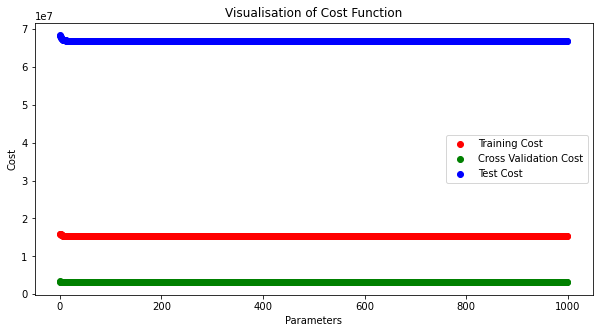

W1 = [[ 1.60009497e-01  6.64696399e-02 -1.87843408e-02  1.92059372e-01
   8.50051032e-02]
 [ 1.79051089e-01  8.15501787e-02 -9.54603303e-03  1.90076889e-01
   1.08413310e-01]
 [ 2.45909671e-01  1.21017207e-01  4.09381460e-03  2.46173818e-01
   1.56047367e-01]
 [ 1.92671388e-01  8.09103437e-02  1.47542975e-02  2.05131550e-01
   1.24572721e-01]
 [ 3.77152459e-01  1.56015684e-01  8.46457882e-03  4.03191377e-01
   2.38485021e-01]
 [ 2.72916668e-01  1.06041871e-01 -7.62673412e-03  2.80461122e-01
   1.70991527e-01]
 [ 3.40457446e-01  1.62356566e-01 -1.90216094e-02  3.68395678e-01
   2.18749441e-01]
 [ 2.71725587e-01  1.10420488e-01 -4.46493288e-03  2.76329449e-01
   1.67212353e-01]
 [ 1.80409720e-01  8.26270920e-02 -1.58149504e-02  2.13700976e-01
   1.29658121e-01]
 [ 2.57873679e-01  1.12757215e-01  4.47646278e-03  2.71325225e-01
   1.64590388e-01]
 [ 2.36977283e-01  8.88917985e-02 -2.70769739e-04  2.42227006e-01
   1.46593321e-01]
 [ 1.56500799e-01  5.23707978e-02  7.26880131e-03  1.5601942

In [30]:
parameters,J,J_cv,J_t = neural_network_model(train_x, train_y, 16,16, num_iterations=1000, lambda_= 10, print_cost=True)
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))
print("W3 = " + str(parameters["W3"]))
print("b3 = " + str(parameters["b3"]))

### ERROR ON CROSS VALIDATION DATA

In [31]:
y_2, cache1 = forward_propagation(valid_x, parameters) #y_2 = predicted cases on cross validation data

In [32]:
y_2.shape

(1, 10944)

In [33]:
### ERROR ON VALID DATA
def RMSE(y_2, valid_y):
    return np.sqrt((y_2 - valid_y) ** 2).mean()
rmse_val = RMSE(np.array(y_2), np.array(valid_y))
print(f" Rms error is:  {rmse_val}")

 Rms error is:  1345.8215411342014


In [34]:
def MSE(y_2, valid_y):
    return (1/len(valid_x))*np.sum((y_2 - valid_y) ** 2)
mse_val = MSE(np.array(y_2), np.array(valid_y))
print(f" Mean Square Error is:  {mse_val}")

 Mean Square Error is:  13796384231.19616


### PLOTTING PREDICTED CASES VS CROSS VALIDATED CASES

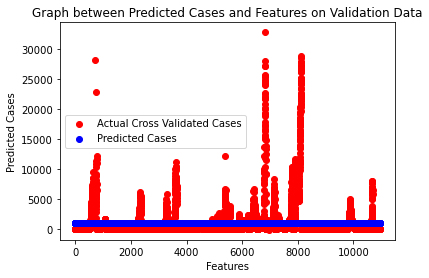

In [35]:
### PLOTTING VALID DATA POINTS 
import matplotlib.pyplot as plt
plt.figure()
plt.scatter(x=list(range(0, len(valid_x.T))),y= valid_y, color='red',label='Actual Cross Validated Cases')         
plt.scatter(x=list(range(0, len(valid_x.T))), y=y_2, color='blue', label='Predicted Cases')
plt.xlabel('Features')
plt.ylabel('Predicted Cases')
plt.title('Graph between Predicted Cases and Features on Validation Data')
plt.legend()
plt.show()

### ERROR ON TEST DATA

In [36]:
 y_3, cache1 = forward_propagation(test_x, parameters) #y_3 = predicted cases on test data

In [37]:
y_3.shape

(1, 10944)

In [38]:
### ERROR ON TEST DATA
def RMSE(y_3, test_y):
    return np.sqrt((y_3 - test_y) ** 2).mean()
rmse_val = RMSE(np.array(y_3), np.array(test_y))
print(f" Rms error is:  {rmse_val}")

 Rms error is:  2670.3515086864754


In [39]:
def MSE(y_3, valid_y):
    return (1/len(valid_x))*np.sum((y_3 - valid_y) ** 2)
mse_val = MSE(np.array(y_3), np.array(valid_y))
print(f" Mean Square Error is:  {mse_val}")

 Mean Square Error is:  13796384231.19616


### PLOTTING PREDICTED CASES VS TEST CASES

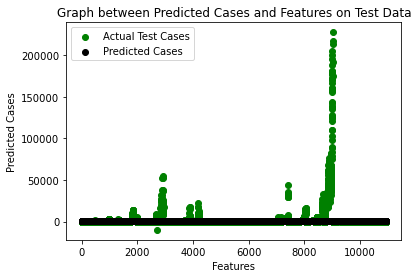

In [40]:
### PLOTTING TEST DATA POINTS 
import matplotlib.pyplot as plt
plt.figure()
plt.scatter(x=list(range(0, len(test_x.T))),y= test_y, color='green',label='Actual Test Cases')         
plt.scatter(x=list(range(0, len(test_x.T))), y=y_3, color='black', label='Predicted Cases')
plt.xlabel('Features')
plt.ylabel('Predicted Cases')
plt.title('Graph between Predicted Cases and Features on Test Data')
plt.legend()
plt.show()